In This File Contain Image Processing Material Offical Documentation

In [2]:
import cv2 as cv
import sys
import numpy as np
import os

In [2]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

In [4]:
# cap = cv.VideoCapture(0)
# while(1):
#  # Take each frame
#  _, frame = cap.read()
#  # Convert BGR to HSV
#  hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
#  # define range of blue color in HSV
#  lower_blue = np.array([110,50,50])
#  upper_blue = np.array([130,255,255])
#  # Threshold the HSV image to get only blue colors
#  mask = cv.inRange(hsv, lower_blue, upper_blue)
#  # Bitwise-AND mask and original image
#  res = cv.bitwise_and(frame,frame, mask= mask)
#  cv.imshow('frame',frame)
#  cv.imshow('mask',mask)
#  cv.imshow('res',res)
#  k = cv.waitKey(5) & 0xFF
#  if k == 27:
#   break
# cv.destroyAllWindows()

**Geometric Transformations of Images**

In [3]:
#Scaling The Image 
img  = cv.imread("D:/PracticeAll/Images/cat.10.jpg")
print(img.shape)
height,width = img.shape[:2]
res = cv.resize(img,(2*height, 2*width), interpolation=cv.INTER_CUBIC)
print(res.shape)
img2 = cv.resize(img,(200,200),interpolation=cv.INTER_LINEAR)
print(img2.shape)
cv.imshow('img',img2)
cv.waitKey(0)
cv.destroyAllWindows()

(499, 489, 3)
(978, 998, 3)
(200, 200, 3)


**Translation**

In [4]:
img = cv.imread("D:/PracticeAll/Images/testingimg.jpg")
print("Image Shape Before Translation", img.shape)

matrix = np.float32([[1,0,100],[0,1,100]])
img = cv.warpAffine(img,matrix,(img.shape[1]+100,img.shape[0]+100))
cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()

Image Shape Before Translation (280, 450, 3)


**Rotation**
 

In [6]:
img = cv.imread("D:/PracticeAll/Images/testingimg.jpg")
height,width = img.shape[:2]
#Translation Matrix
matrix = cv.getRotationMatrix2D((width/2,height/2),65,1)
translated = cv.warpAffine(img,matrix,(width,height))

cv.imshow('img', translated)
cv.waitKey(0)
cv.destroyAllWindows()

**Affine Transformation**

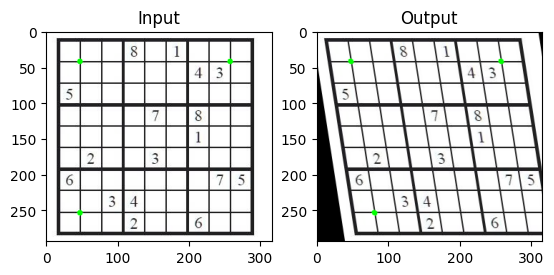

In [5]:
import matplotlib.pyplot as plt
img = cv.imread("D:/PracticeAll/Images/suduko.jpg")
rows,cols,ch = img.shape
cv.circle(img,(47,42),4,(0,255,0),-1)
cv.circle(img,(257,42),4,(0,255,0),-1)
cv.circle(img,(47,254),4,(0,255,0),-1)

# cv.circle(img,(257,254),4,(0,255,0),-1)

pts1 = np.float32([[47,42],[257,42],[47,254]])
pts2 = np.float32([[47,42],[257,42],[80,254]])

matrix = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,matrix,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title("Input")
plt.subplot(122),plt.imshow(dst),plt.title("Output")
plt.show()

# plt.imshow(img)
# cv.imshow('img', img)
# cv.imshow('Affine Image', dst)

# cv.waitKey(0)
# cv.destroyAllWindows()

**Image Thresholding**
Simple Thresholding
    cv.THRESH_BINARY
    cv.THRESH_BINARY_INV
    cv.THRESH_TRUNC
    cv.THRESH_TOZERO
    cv.THRESH_TOZERO_INV

(824, 860, 3)


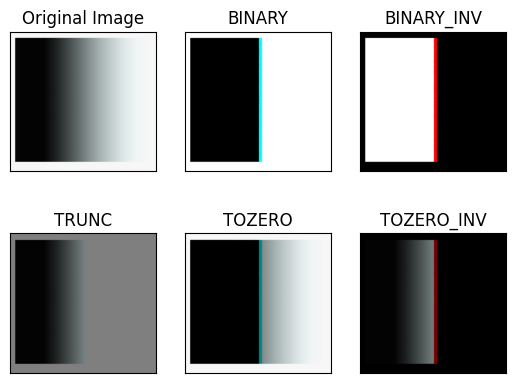

In [8]:
img = cv.imread('D:/PracticeAll/Images/gradient.png')
print(img.shape)
_, thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
_, thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
_, thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
_, thresh4 = cv.threshold(img, 127,255, cv.THRESH_TOZERO)
_, thresh5 = cv.threshold(img, 127,255,cv.THRESH_TOZERO_INV)


titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2,thresh3,thresh4, thresh5]
for i in range(6):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=300)
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()






**Adaptive Thresholding**

(1024, 896)


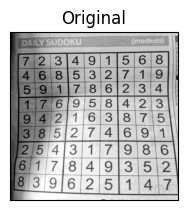

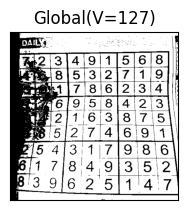

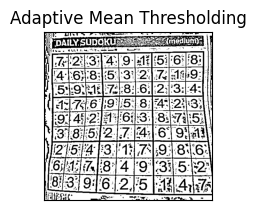

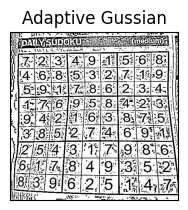

In [9]:
img = cv.imread('D:/PracticeAll/Images/suduko2.jpg',0)
print(img.shape)
img = cv.resize(img,(500,500))
_, th1 = cv.threshold(img, 127,255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

titles = ['Original','Global(V=127)','Adaptive Mean Thresholding', 'Adaptive Gussian']
images = [img,th1,th2,th3]

for i in range (4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.show()


# cv.imshow("Image",img)
# cv.imshow("Threshhold", th1)
# cv.imshow("Image2",th2)
# cv.waitKey(0)
# cv.destroyAllWindows()

**Otsu's Binarization**